In [1]:
import pandas as pd

# Load the dataset
file_path = './wholesale_customers/Wholesale customers data.csv'
data = pd.read_csv(file_path)

# Drop the Region column
data = data.drop(columns=['Region'])

# Display the first few rows of the modified dataset
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [2]:
# Filter the data for clients that are restaurants, hotels, and caf�s (Channel 1 and 2)
filtered_data = data[data['Channel'].isin([1, 2])]

# Display the first few rows of the filtered dataset
filtered_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [3]:
# Normalize the data by computing the proportionate spending per product category
normalized_data = filtered_data.copy()
normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].div(normalized_data.iloc[:, 1:].sum(axis=1), axis=0)

# Display the first few rows of the normalized dataset
normalized_data.head()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_233012\2253634465.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.371394
1      0.212139
2      0.173532
3      0.484460
4      0.490564
         ...   
435    0.405214
436    0.810965
437    0.187722
438    0.576988
439    0.367242
Name: Fresh, Length: 440, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].div(normalized_data.iloc[:, 1:].sum(axis=1), axis=0)
C:\Users\LucaH\AppData\Local\Temp\ipykernel_233012\2253634465.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.283068
1      0.294896
2      0.240590
3      0.043680
4      0.117354
         ...   
435    0.164402
436    0.029583
437    0.200085
438    0.111080
439    0.223745
Name: Milk, Length: 440, dtype: fl

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,1,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,2,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = normalized_data.copy()
standardized_data.iloc[:, 1:] = scaler.fit_transform(standardized_data.iloc[:, 1:])

# Display the first few rows of the standardized dataset
standardized_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,-0.014611,1.023251,-0.054858,-0.880951,0.051638,-0.196712
1,2,-0.657045,1.127990,0.396183,-0.467520,0.307121,0.128111
2,2,-0.812784,0.647109,-0.135292,-0.354847,0.270529,3.817332
3,1,0.441494,-1.096545,-0.516330,1.134352,-0.690865,0.401308
4,2,0.466117,-0.444159,-0.502786,-0.184567,-0.442462,1.483100


In [5]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = normalized_data.copy()
standardized_data.iloc[:, 1:] = scaler.fit_transform(standardized_data.iloc[:, 1:])

# Display the first few rows of the standardized dataset
standardized_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,-0.014611,1.023251,-0.054858,-0.880951,0.051638,-0.196712
1,2,-0.657045,1.127990,0.396183,-0.467520,0.307121,0.128111
2,2,-0.812784,0.647109,-0.135292,-0.354847,0.270529,3.817332
3,1,0.441494,-1.096545,-0.516330,1.134352,-0.690865,0.401308
4,2,0.466117,-0.444159,-0.502786,-0.184567,-0.442462,1.483100


In [7]:
from sklearn.cluster import KMeans

# Use K-means to cluster the customers into K = 4 groups
kmeans = KMeans(n_clusters=4, random_state=42)
standardized_data['Cluster'] = kmeans.fit_predict(standardized_data.iloc[:, 1:])

# Display the first few rows of the dataset with cluster labels
standardized_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,-0.014611,1.023251,-0.054858,-0.880951,0.051638,-0.196712,0
1,2,-0.657045,1.127990,0.396183,-0.467520,0.307121,0.128111,0
2,2,-0.812784,0.647109,-0.135292,-0.354847,0.270529,3.817332,3
3,1,0.441494,-1.096545,-0.516330,1.134352,-0.690865,0.401308,2
4,2,0.466117,-0.444159,-0.502786,-0.184567,-0.442462,1.483100,3


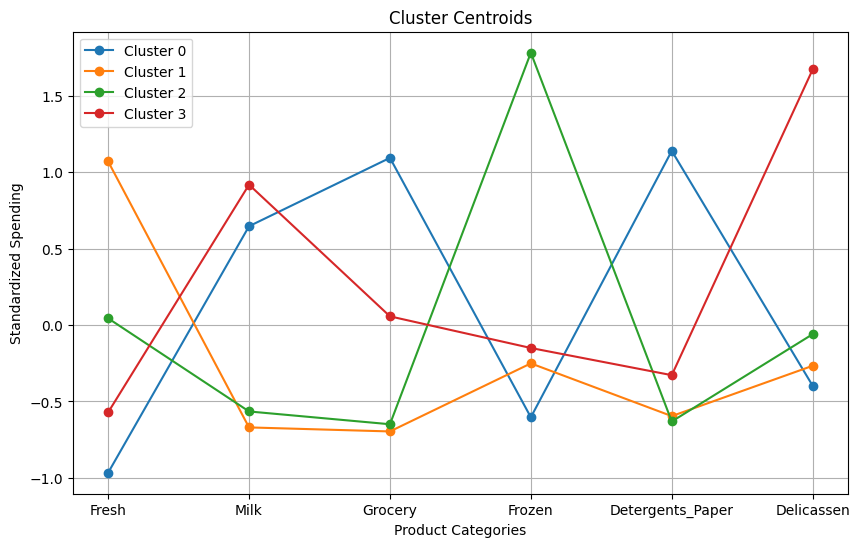

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids
centroids_df = pd.DataFrame(centroids, columns=standardized_data.columns[1:-1])

# Plot the centroids
plt.figure(figsize=(10, 6))
for i in range(centroids_df.shape[0]):
    plt.plot(centroids_df.columns, centroids_df.iloc[i], marker='o', label=f'Cluster {i}')
plt.title('Cluster Centroids')
plt.xlabel('Product Categories')
plt.ylabel('Standardized Spending')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Create a summary description for each cluster based on the centroids
cluster_descriptions = {}

for i in range(centroids_df.shape[0]):
    cluster_descriptions[i] = centroids_df.iloc[i].to_dict()

cluster_descriptions

{0: {'Fresh': -0.9665505661443339,
  'Milk': 0.6470382493657469,
  'Grocery': 1.0945004051048113,
  'Frozen': -0.603583630193576,
  'Detergents_Paper': 1.1402657320219445,
  'Delicassen': -0.3973010769519914},
 1: {'Fresh': 1.0710142197218302,
  'Milk': -0.6699349782390508,
  'Grocery': -0.6963018251027652,
  'Frozen': -0.2507951703379481,
  'Detergents_Paper': -0.5959224054671507,
  'Delicassen': -0.26658260008658446},
 2: {'Fresh': 0.04422040560618531,
  'Milk': -0.5654917867505185,
  'Grocery': -0.6492285739912264,
  'Frozen': 1.7828182592093356,
  'Detergents_Paper': -0.6312123656062231,
  'Delicassen': -0.0596636541290222},
 3: {'Fresh': -0.5715367871484096,
  'Milk': 0.918880123770106,
  'Grocery': 0.057093611043304265,
  'Frozen': -0.15008542739507097,
  'Detergents_Paper': -0.3279709261901303,
  'Delicassen': 1.673147179543667}}